In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Inspried from** *:* [https://www.tensorflow.org/tutorials/generative/style_transfer](http://)

**SETUP**

In [2]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [3]:
#LIBRARIES
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import time
import functools

In [4]:
#Tensor to image function.
def tensor_to_image(tensor):
    #Make sure that tensor is an numpy array.
    tensor = tensor * 255
    tensor = np.array(tensor,dtype = np.uint8)
    #Check the channel size of tensor.
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] ==1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)
        

In [5]:
#Download content and style images.
content_path = tf.keras.utils.get_file("king_charles.jpeg","https://bikopek.com/public/resim/cins/a9ea41c35d6d35c245f9ec7445856c80.jpg")
style_path = tf.keras.utils.get_file("scream.jpg","https://assets-prd.ignimgs.com/2021/08/31/the-scream-figma-1630435917335.jpeg")

262144/245809 [===============================] - 0s 1us/step


**VISUALIZE THE INPUT**

In [6]:
def load_img(path):
    #Get image and convert it to tf.float32 type.
    max_dim = 512
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img,channels = 3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    
    #Determine the new shape of image with respect to scale.
    shape = tf.cast(tf.shape(img)[:-1],tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim 
    
    new_shape = tf.cast(shape * scale,tf.int32)
    #Create new sized image.
    img = tf.image.resize(img,new_shape)
    img = img[tf.newaxis,:]
    return img

In [7]:
#Image display function.
def imshow(img,title = None):
    plt.imshow(img[0,:,:,:])
    if title:
        plt.title(title)

2023-01-21 19:22:25.500224: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


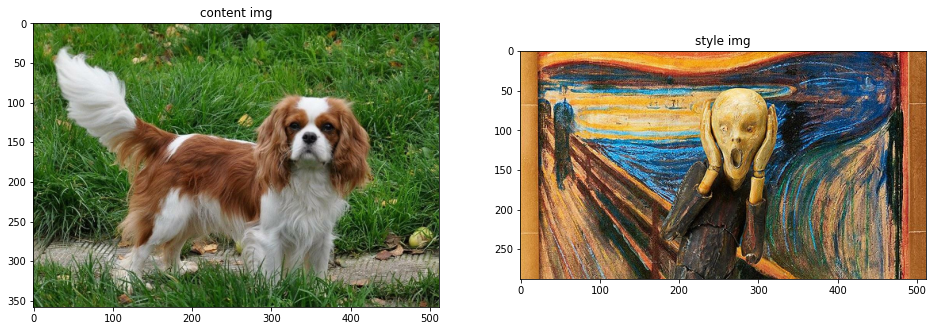

In [8]:

content_img = load_img(content_path)
style_img = load_img(style_path)

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
imshow(content_img,"content img")

plt.subplot(1,2,2)
imshow(style_img,"style img")

**STYLE TRANSFER WITH TF-HUB**

2023-01-21 19:22:30.320183: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


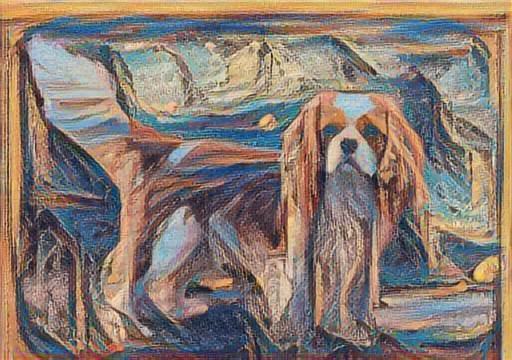

In [9]:
import tensorflow_hub as hub
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
stylized_img = hub_model(tf.constant(content_img),tf.constant(style_img))[0]
tensor_to_image(stylized_img)